In [11]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

x25 = 0
x16 = 0

y = np.array([3.1, 6.2, 4.8, 3.7, 9.1, 6.8])


for i in range(1000): 
    A = np.array([[2,1],[4,2],[3,1.7],[2.1,1.1],[6, x25],[x16, 2.2]])
    res = np.linalg.lstsq(A, y)
    w = res[0]
    
    x25 = (9.1 - 6*w[0])/w[1]
    x16 = (6.8 - 2.2*w[1])/w[0]

    print(w)


[ 1.14239015  1.6356519 ]
[ 1.19390172  1.08701331]
[ 1.28733894  0.71700994]
[ 1.3463278   0.52180419]
[ 1.36925673  0.44651277]
[ 1.37480089  0.4248898 ]
[ 1.37365268  0.4233741 ]
[ 1.37006092  0.4290242 ]
[ 1.36555839  0.43724948]
[ 1.36068321  0.44646251]
[ 1.35562441  0.45611559]
[ 1.35045067  0.46601548]
[ 1.34518976  0.47608845]
[ 1.33985597  0.48630025]
[ 1.33445949  0.49662898]
[ 1.32900964  0.50705594]
[ 1.3235159   0.51756259]
[ 1.3179883   0.52812957]
[ 1.31243746  0.53873647]
[ 1.30687455  0.54936182]
[ 1.30131128  0.55998323]
[ 1.29575975  0.57057758]
[ 1.29023236  0.58112121]
[ 1.28474169  0.59159015]
[ 1.27930037  0.60196039]
[ 1.27392093  0.61220813]
[ 1.26861569  0.62231006]
[ 1.26339657  0.63224361]
[ 1.25827501  0.64198722]
[ 1.25326178  0.65152056]
[ 1.24836694  0.66082479]
[ 1.24359965  0.66988271]
[ 1.23896815  0.67867896]
[ 1.23447965  0.68720011]
[ 1.23014032  0.69543477]
[ 1.22595522  0.70337363]
[ 1.22192831  0.71100948]
[ 1.21806247  0.71833719]
[ 1.21435951

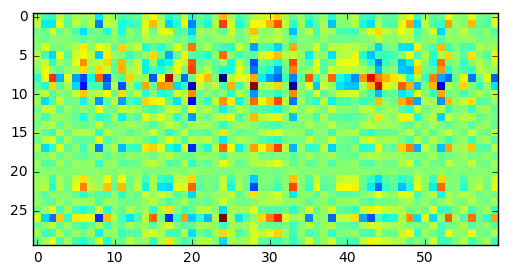

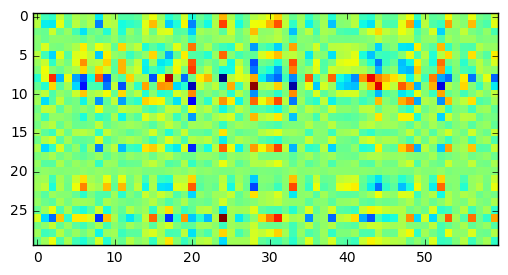

In [13]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

M = 30
N = 60
K = 2 

W_true = np.random.randn(M,K)
H_true = np.random.randn(K,N)

X = W_true.dot(H_true)
X = X+0.01*np.random.randn(M,N)

Mask = (np.random.rand(M,N)<0.8)



W = np.random.randn(M,K)
H = np.random.randn(K,N)

EPOCH = 1000

eta = 0.01

for i in range(EPOCH):
    dW = -(Mask*(X-W.dot(H))).dot(H.T)
    W = W - eta*dW
    dH = -W.T.dot((Mask*(X-W.dot(H))))
    H = H - eta*dH

    #print(0.5*np.sum((Mask*(X-W.dot(H)))**2))


plt.imshow(X, interpolation='nearest')
plt.show()
plt.imshow(W.dot(H), interpolation='nearest')
plt.show()

